In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
data_no_outliers = pd.read_csv("../dataset/4.data_no_outliers.csv", engine='python')
data_no_outliers

,Text
0,autocomplet result avail use arrow review ente...
1,2020 2019 2018 2017 2016 2015 2014 2013 2012 2...
2,statement resum 73rd world health assembl chai...
3,autocomplet result avail use arrow review ente...
4,autocomplet result avail use arrow review ente...
...,...
430,m8 glasgow citi eastbound sever disrupt j16 ca...
431,m5 bristol southbound sever disrupt a4 m5 bris...
432,conserv group wwf warn koala could wipe austra...
433,a47 norfolk westbound sever accid shack lane a...


In [3]:
data_no_outliers.dropna(subset = ["Text"], inplace=True)
data = data_no_outliers
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000
)
text_content = data['Text']
# tfidf = TfidfVectorizer()
text  = tfidf.fit_transform(text_content)
text_content.head()

0    autocomplet result avail use arrow review ente...
1    2020 2019 2018 2017 2016 2015 2014 2013 2012 2...
2    statement resum 73rd world health assembl chai...
3    autocomplet result avail use arrow review ente...
4    autocomplet result avail use arrow review ente...
Name: Text, dtype: object

Fit 1 clusters
Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters


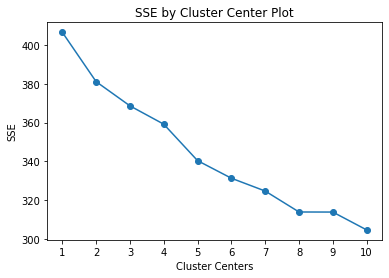

In [4]:
def find_optimal_clusters(data, max_k):
    iters = range(1, max_k+1)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 10)

In [5]:
clusters = MiniBatchKMeans(n_clusters=2, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

In [6]:
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [7]:
data_no_outliers['label'] = 0
for position in data_no_outliers.index :
    data_no_outliers['label'][position] = clusters[position]
#data_no_outliers.to_csv(r'dataset/data_with_label_1_clustered_again.csv', index = False)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


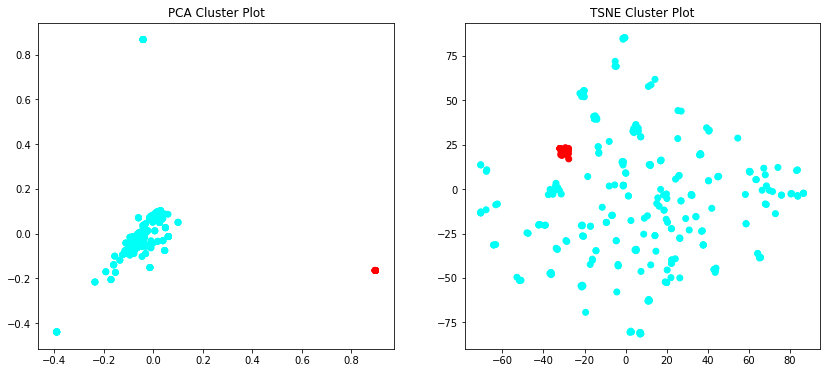

In [8]:
def plot_tsne_pca(data, labels):
    max_label = max(labels) + 1
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=True)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)
    

In [9]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
protect,prevent,diseas,live,control,save,four,seven,center,twenti

Cluster 1
report,case,spread,peopl,test,vaccin,young,health,19,covid


In [10]:
data = data_no_outliers
data_no_outliers = pd.DataFrame()
data_no_outliers['Text'] = ''
count = 0
for i in data.index :
    if ((data['label'][i] == 1)) :
        data_no_outliers = data_no_outliers.append({'Text': data['Text'][i]} , ignore_index=True)
        count += 1
        print(data['Text'][i])
data

autocomplet result avail use arrow review enter select
2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 headquart hq antimicrobi resist divis busi oper academi communic diseas climat determin health framework convent tobacco control dgo deputi director gener offic data analyt deliveri director gener offic emerg respons access medicin health product chief scientist scienc divis extern relat govern uhc life cours uhc communic noncommunic diseas uhc healthier popul emerg prepared health metric measur health secur environ special initi health emerg programm special programm tdr sci staff health insur fnm bo polio erad dgo pandem influenza prepared wpe polio emerg countri collabor organ common charg expenditur bo noncommunic diseas mental health partnership matern newborn child health uhl access medicin vaccin pharmaceut famili woman child health gener manag exd offic health emerg prepared special programm hrp uhl allianc health polici system research sci hiv 

autocomplet result avail use arrow review enter select
health emerg highlight issu health emerg highlight contain inform current humanitarian context health prioriti respons oper three four focu countri month issu also highlight polici work area health humantiarian action done partner event themat issu relat health emerg health emerg highlight 108 120 million covid 19 rapid antigen test low middl incom countri zero toler polici sexual exploit abus refuge scholarship displac due conflict share covid 19 experi deploy help refuge migrant lesvo fire burn camp fate hand educ child prevent zika support home base strategi reliev health facil africa strengthen cross border surveil eu deliv emerg life save suppli flood affect area nationwid measl campaign start octob expand covid 19 surveil system life save antitoxin deliv treat child diphtheria hiv prevent high burden set voluntari medic male circumcis covid 19 infect least 570 000 health worker kill 2 500 america live digit space behind scene

brazzavil covid 19 case african region risen steadili past two month underscor need reinforc public health measur avert surg infect particularli peopl gather travel end year celebr sinc mid octob averag 46 000 case per week record 47 countri world health organ african region compar 29 000 case per week earli septemb earli octob ten countri region report highest number case account 88 new case past month howev seven countri record steadi declin case past four week increas movement interact well slack observ public health measur physic distanc wear mask factor behind upsurg case gather polit ralli close set also contribut rise infect rise covid 19 infect holiday season present worri mix said dr richard mihigo immun vaccin develop programm coordin region offic africa prevent measur must tighten limit risk infect festiv season stand perman barrier spread covid 19 complac place fight pandem mani countri improv covid 19 respons includ diagnosi test remain low across region past four week eig

perform broad base test prepar broad base viral test facil known suspect sar cov 2 exposur moder substanti transmiss commun
end home isol person covid 19 symptom direct care home may discontinu isol follow condit least 10 day pas sinc symptom onset least 24 hour pas sinc fever resolv without use fever reduc medic symptom improv small fraction person sever ill may produc replic compet viru beyond 10 day may warrant extend durat isol precaut 20 day symptom onset consid consult infect control expert person infect sar cov 2 never develop covid 19 symptom may discontinu isol least 10 day follow date posit rt pcr test sar cov 2 rna
framework non covid 19 care framework support healthcar provid expand necessari non covid 19 clinic care safest way possibl patient
cdc info 800 cdc info 800 232 4636 answer varieti covid 19 question help healthcar worker healthcar provid health depart question clinic manag covid 19 plea contact cdc info
serolog test cdc develop new laboratori test assist effort d

think might covid 19 import stay home away peopl stay away help stop spread covid 19 emerg warn sign includ troubl breath get emerg medic care immedi think know covid 19 symptom around 10 day sinc symptom first appear 24 hour fever without use fever reduc medic symptom covid 19 improv loss tast smell may persist week month recoveri need delay end isol peopl requir test decid around howev healthcar provid recommend test let know resum around base test result note recommend appli person sever covid 19 sever weaken immun system immunocompromis person follow guidanc sever ill covid 19 sever weaken immun system immunocompromis due health condit medic around test posit covid 19 symptom continu symptom 10 day pas sinc posit viral test covid 19 peopl requir test decid around howev healthcar provid recommend test let know resum around base test result develop symptom test posit follow guidanc think know covid 19 symptom sever ill covid 19 sever weaken immun system immunocompromis due health con

covid 19 case hospit death across unit state rise take step slow spread covid 19
covid 19 case hospit death across unit state rise take step slow spread covid 19
covid 19 case hospit death across unit state rise take step slow spread covid 19
lo caso hospitalizacion muert por covid 19 están aumentando en lo estado unido tome medida para desacelerar la propagación del covid 19
số ca bệnh tỉ lệ nhập viện và tử vong vì covid 19 trên toàn hoa kỳ đang tăng lên thực hiện các bước làm chậm sự lâi lan covid 19
미국 전역에서 covid 19 환자 입원 및 사망이 증가하고 있습니다 covid 19 확산을 늦추기 위한 조치를 취하세요
covid 19 case death rise across unit state must remain vigil chang make routin daili life extrem hard chang even import futur must stop spread new danger viru step famili take prevent spread covid 19 safer
differ influenza flu covid 19 influenza flu covid 19 contagi respiratori ill caus differ virus covid 19 caus infect new coronaviru call sar cov 2 flu caus infect influenza virus key differ flu covid 19 covid 19 seem sp

covid 19 case hospit death across unit state rise take step slow spread covid 19
covid 19 case hospit death across unit state rise take step slow spread covid 19
covid 19 case hospit death across unit state rise take step slow spread covid 19
covid 19 case hospit death across unit state rise take step slow spread covid 19
covid 19 case hospit death across unit state rise take step slow spread covid 19
lo caso hospitalizacion muert por covid 19 están aumentando en lo estado unido tome medida para desacelerar la propagación del covid 19
số ca bệnh tỉ lệ nhập viện và tử vong vì covid 19 trên toàn hoa kỳ đang tăng lên thực hiện các bước làm chậm sự lâi lan covid 19
미국 전역에서 covid 19 환자 입원 및 사망이 증가하고 있습니다 covid 19 확산을 늦추기 위한 조치를 취하세요
covid 19 case death rise across unit state must remain vigil chang make routin daili life extrem hard chang even import futur must stop spread new danger viru step famili take prevent spread covid 19 safer
differ influenza flu covid 19 influenza flu covid 19 con

lo caso hospitalizacion muert por covid 19 están aumentando en lo estado unido tome medida para desacelerar la propagación del covid 19
el covid 19 se propaga con mayor facilidad en espacio interior que al air libr lo estudio demuestran que la persona tienen má probabilidad de estar expuesta al covid 19 cuando están meno de 6 pie de distancia de otra persona por periodo prolongado e má probabl que esté expuesto al covid 19 cuando asist evento en espacio cerrado muy concurrido con mala ventilación tien contacto cercano con persona infectada en casa e meno probabl que esté expuesto al covid 19 cuando
ícono claro la seguridad de la vacuna contra el covid 19 e la máxima prioridad el sistema de seguridad de la vacuna en lo estado unido garantiza que toda la vacuna sean lo má segura posibl conozca cómo están trabajando junto lo socio nivel feder para garantizar la seguridad de la vacuna contra el covid 19 lo cdc crearon una herramienta nueva safe como medida adicion de control de la segurida

tiktok download devic 2 billion time popular app among young peopl global kristen 15 spend lot time use app help gain 700k follow explain appeal tiktok teenag like share tip find stori young peopl bbc young report websit follow bbc young report twitter youtub
11 18 year old chanc tell stori matter
system racism issu u uk make differ put child question black live matter movement politician historian academ produc alex dackevych collabor bbc young report
19 mean covid 19 coronaviru surviv antarct jonathan ball professor virolog univers nottingham answer scienc question sent child probabl wonder
small group student jo richardson commun school still go everyday parent key worker experi school lockdown messag advic young peopl find stori young peopl bbc young report websit
young person worri anxiou plea speak adult also plenti help support childlin websit
m5 bristol southbound sever disrupt a4 m5 bristol one lane close m5 avonmouth link road southbound citi bristol a4 portway roundabout flo

video caption young peopl get 100 day lockdown young peopl get 100 day lockdown
vape increasingli popular bethan take look advertis home town spot buse take student school vape advert although health expert say vape better smoke question whether right advertis product aim adult transport specif young peopl found potenti loophol way vape advertis find stori young peopl bbc young report websit
callum told suffer stutter sinc age seven spent life walk thesauru think word could use replac one say make order restaur lesson school even say name callum say stutter use affect everi aspect life discov group help take control speech inspir help struggl way world find stori young peopl bbc young report websit
teenag west midland urg young girl find voic speak upskirt upskirt imag taken underneath victim cloth without permiss often undetect morgan target local swim pool two year ago 17 tri rais awar law came forc last april make upskirt crimin offenc england wale morgan region winner bbc young rep

,Text,label
0,autocomplet result avail use arrow review ente...,1
1,2020 2019 2018 2017 2016 2015 2014 2013 2012 2...,1
2,statement resum 73rd world health assembl chai...,1
3,autocomplet result avail use arrow review ente...,1
4,autocomplet result avail use arrow review ente...,1
...,...,...
430,m8 glasgow citi eastbound sever disrupt j16 ca...,1
431,m5 bristol southbound sever disrupt a4 m5 bris...,1
432,conserv group wwf warn koala could wipe austra...,1
433,a47 norfolk westbound sever accid shack lane a...,1


In [11]:
data_no_outliers.dropna(subset = ["Text"], inplace=True)
data = data_no_outliers
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000
)
text_content = data['Text']
# tfidf = TfidfVectorizer()
text  = tfidf.fit_transform(text_content)
text_content.head()

0    autocomplet result avail use arrow review ente...
1    2020 2019 2018 2017 2016 2015 2014 2013 2012 2...
2    statement resum 73rd world health assembl chai...
3    autocomplet result avail use arrow review ente...
4    autocomplet result avail use arrow review ente...
Name: Text, dtype: object

Fit 1 clusters
Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters


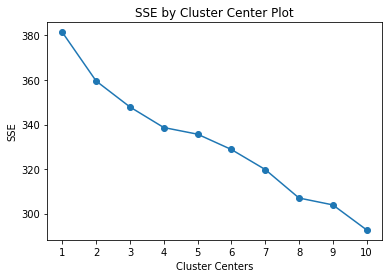

In [12]:
find_optimal_clusters(text, 10)

In [13]:
clusters = MiniBatchKMeans(n_clusters=2, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

In [14]:
data_no_outliers['label'] = 0
for position in data_no_outliers.index :
    data_no_outliers['label'][position] = clusters[position]

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


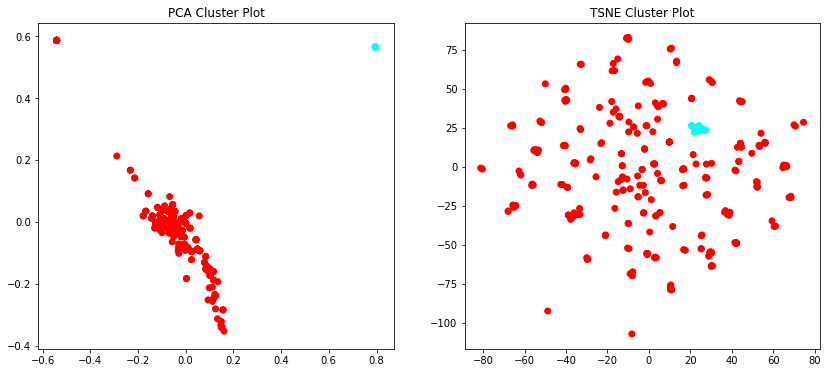

In [15]:
plot_tsne_pca(text, clusters)


In [16]:
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
report,case,spread,test,vaccin,peopl,young,health,19,covid

Cluster 1
equiti,estim,use,avail,result,review,select,enter,autocomplet,arrow


In [17]:
data = data_no_outliers
data_no_outliers = pd.DataFrame()
data_no_outliers['Text'] = ''
count = 0
for i in data.index :
    if ((data['label'][i] == 0)) :
        data_no_outliers = data_no_outliers.append({'Text': data['Text'][i]} , ignore_index=True)
        count += 1
        print(data['Text'][i])
data

2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 headquart hq antimicrobi resist divis busi oper academi communic diseas climat determin health framework convent tobacco control dgo deputi director gener offic data analyt deliveri director gener offic emerg respons access medicin health product chief scientist scienc divis extern relat govern uhc life cours uhc communic noncommunic diseas uhc healthier popul emerg prepared health metric measur health secur environ special initi health emerg programm special programm tdr sci staff health insur fnm bo polio erad dgo pandem influenza prepared wpe polio emerg countri collabor organ common charg expenditur bo noncommunic diseas mental health partnership matern newborn child health uhl access medicin vaccin pharmaceut famili woman child health gener manag exd offic health emerg prepared special programm hrp uhl allianc health polici system research sci hiv aid tb neglect tropic diseas extern relat govern exdgo 

23 decemb 2020 eighti seven 87 new covid 19 case identifi 2366 sampl test today bring cumul number confirm case seven thousand five hundr nineti eight 7598 date six thousand one hundr sixti three 6163 patient recov one past 24 hour number activ case one thousand three hundr sixti two 1369 sixti six 66 death new case kigali 71 rubavu 9 huy 5 huy 5 rusizi 1 nyanza 1 heighten vigil requir everywher covid 19 prevent measur announc govern rwanda must continu rigor observ especi frequent hand wash physic distanc addit face mask must worn public multi famili compound withhold inform relat contact trace covid 19 symptom jeopardis public safeti punish accord applic law key symptom coronaviru dri cough short breath fever autom screen avail dial 114 symptom also report medic profession follow phone 114 toll free whatsapp messag 250788202080 mail callcent rbc gov rw let continu work togeth defeat pandem inform click rwanda biomed centr websit http www rbc gov rw click african region covid 19 dashb

get inform cdc nation global respons find document guidanc support local public health effort
need quarantin peopl close contact someon covid 19 exclud peopl covid 19 within past 3 month peopl test posit covid 19 need quarantin get test 3 month long develop symptom peopl develop symptom within 3 month first bout covid 19 may need test caus identifi symptom count close contact within 6 foot someon covid 19 total 15 minut provid care home someon sick covid 19 direct physic contact person hug kiss share eat drink utensil sneez cough somehow got respiratori droplet step take stay home monitor health stay home 14 day last contact person covid 19 watch fever 100 4 cough short breath symptom covid 19 possibl stay away especi peopl higher risk get sick covid 19 option reduc quarantin reduc length quarantin may make easier peopl quarantin reduc time work shorter quarantin period also lessen stress public health system especi new infect rapidli rise local public health author make final decis lo

holiday travel travel may increas chanc spread get covid 19 cdc continu recommend postpon travel stay home best way protect year consid travel winter holiday import question ask love one beforehand question help decid best famili someon household someon visit increas risk get sick covid 19 case high increas commun destin case commun destin like get spread covid 19 result door door travel check cdc covid data tracker latest number case area hospit commun destin overwhelm patient covid 19 find check state local public health depart websit home destin requir restrict travel check state local requir travel 14 day travel visit close contact peopl live plan includ travel bu train airplan might make stay 6 foot apart difficult travel peopl live answer question ye consid make plan host virtual gather delay travel answer decid travel sure take step trip protect covid 19
adult age certain underli medic condit increas risk sever ill viru caus covid 19 mrna covid 19 vaccin may administ peopl under

serolog test cdc develop new laboratori test assist effort determin much popul expo sar cov 2 viru caus covid 19
order get keep america open state tribe local territori must abl quickli identifi new case break chain transmiss protect first respond health care worker infect page provid state tribe local territori key resourc covid 19 infect prevent control laboratori capac commun mitig surveil data analyt contact trace staf
perform broad base test prepar broad base viral test facil known suspect sar cov 2 exposur moder substanti transmiss commun
surveil covid 19 caus sar cov 2 unit state cdc use multipl surveil system run collabor state local territori health depart public health commerci clinic laboratori vital statist offic health care provid emerg depart academ partner monitor covid 19 diseas unit state covidview weekli summari cdc report provid weekli summari interpret key indic adapt track covid 19 pandem unit state cdc report provid weekli summari interpret key indic adapt track c

holiday travel travel may increas chanc spread get covid 19 cdc continu recommend postpon travel stay home best way protect year consid travel winter holiday import question ask love one beforehand question help decid best famili someon household someon visit increas risk get sick covid 19 case high increas commun destin case commun destin like get spread covid 19 result door door travel check cdc covid data tracker latest number case area hospit commun destin overwhelm patient covid 19 find check state local public health depart websit home destin requir restrict travel check state local requir travel 14 day travel visit close contact peopl live plan includ travel bu train airplan might make stay 6 foot apart difficult travel peopl live answer question ye consid make plan host virtual gather delay travel answer decid travel sure take step trip protect covid 19
adult age certain underli medic condit increas risk sever ill viru caus covid 19 mrna covid 19 vaccin may administ peopl under

stop spread home learn protect love one covid 19
thing need know learn need know covid 19 pandem protect famili learn
student show sign covid 19 need isol quick guid school nurs school covid 19 poc
higher risk sever ill poster learn higher risk sever ill covid 19
guidanc help administr manag limit exposur spread covid 19
know factsheet protect covid 19
health equiti everyon opportun healthi possibl long stand system health social inequ put mani racial ethnic minor group increas risk get sick die covid 19 stop spread covid 19 move toward greater health equiti must work togeth ensur resourc avail maintain manag physic mental health includ easi access inform afford test medic mental health care
around someon diagnos covid 19 someon health depart may call answer call help slow spread covid 19 commun short video inform public contact trace respond call contact tracer
commun mitig strategi cdc commun mitig framework action individu busi health depart commun set school take slow spread covid 

adult age certain underli medic condit increas risk sever ill viru caus covid 19 mrna covid 19 vaccin may administ peopl underli medic condit provid sever allerg reaction ingredi vaccin follow inform aim help peopl group list make inform decis receiv mrna covid 19 vaccin peopl weaken immun system peopl hiv weaken immun system due ill medic might increas risk sever covid 19 may receiv covid 19 vaccin howev awar limit safeti data inform safeti mrna covid 19 vaccin peopl weaken immun system group yet avail peopl live hiv includ clinic trial though safeti data specif group yet avail time peopl weaken immun system also awar potenti reduc immun respons vaccin well need continu follow current guidanc protect covid 19 see peopl autoimmun condit peopl autoimmun condit may receiv mrna covid 19 vaccin howev awar data current avail safeti mrna covid 19 vaccin individu group elig enrol clinic trial peopl previous guillain barr syndrom person previous gb may receiv mrna covid 19 vaccin date case gui

video caption covid classroom pandem chang u teacher live covid classroom pandem chang u teacher live
death covid 19 mention death certif sourc nr nisra data updat weekli case peopl test posit coronaviru averag area mean middl rank council local govern district rank case per 100 000 peopl public health bodi may occasion revis case number case rate age avail england sourc uk public health bodi updat weekday
covid mass test work ian westbrook bbc news publish durat 3 day ago imag copyright getti imag mass test come seen key part stop spread covid hope identifi peopl may contagi includ without symptom deploy help lorri driver strand kent go expand care home mass test import mass test make easier find peopl may unawar infect told isol prevent spread viru mass test also use target way includ regular test hospit care home prevent outbreak keep open place school univers viru spread help peopl safe attend cinema theatr footbal match one test entri test offer pilot scheme offer two type test in

video content video caption wolfgang lost job due covid start film flight save sport wolfgang lost job due covid start film flight save sport hang glider wolfgang siess lost job due coronaviru start film flight tri attract peopl sport
m8 glasgow citi eastbound sever disrupt j16 canal street j15 a803 glebe street m8 glasgow citi one lane close m8 eastbound j16 canal craighal j15 a803 townhead breakdown traffic cope well report traffic travel incid dial 0330 123 0184 time
m5 bristol southbound sever disrupt a4 m5 bristol one lane close m5 avonmouth link road southbound citi bristol a4 portway roundabout flood report traffic travel incid dial 0330 123 0184 time
conserv group wwf warn koala could wipe australian state amid deforest increas attack livestock video produc trystan young listen world servic newsroom programm bbc iplay main imag courtesi sue gedda wwf
a47 norfolk westbound sever accid shack lane a1042 yarmouth road a47 norfolk a47 close westbound blofield junction a1042 yarmouth

small group student jo richardson commun school still go everyday parent key worker experi school lockdown messag advic young peopl find stori young peopl bbc young report websit
young person worri anxiou plea speak adult also plenti help support childlin websit
m5 bristol southbound sever disrupt a4 m5 bristol one lane close m5 avonmouth link road southbound citi bristol a4 portway roundabout flood report traffic travel incid dial 0330 123 0184 time
social medium peopl report malfunct gp system climber reli mountain unclear caught blizzard avalanch affect
afp copyright afp tunisia extend nightli curfew mid januari health author said decis announc tuesday night follow recommend countri covid 19 scientif committe 120 000 posit case record sinc march major infect recent month health ministri said new strain covid 19 record tunisia ad countri expect roll vaccin april offici figur show death rate averag 40 day 77 icu bed across countri occupi grow public frustrat continu restrict measur cu

,Text,label
0,autocomplet result avail use arrow review ente...,1
1,2020 2019 2018 2017 2016 2015 2014 2013 2012 2...,0
2,statement resum 73rd world health assembl chai...,0
3,autocomplet result avail use arrow review ente...,1
4,autocomplet result avail use arrow review ente...,1
...,...,...
403,m8 glasgow citi eastbound sever disrupt j16 ca...,0
404,m5 bristol southbound sever disrupt a4 m5 bris...,0
405,conserv group wwf warn koala could wipe austra...,0
406,a47 norfolk westbound sever accid shack lane a...,0


In [18]:
data_no_outliers.dropna(subset = ["Text"], inplace=True)
data = data_no_outliers
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000
)
text_content = data['Text']
# tfidf = TfidfVectorizer()
text  = tfidf.fit_transform(text_content)
text_content.head()

0    2020 2019 2018 2017 2016 2015 2014 2013 2012 2...
1    statement resum 73rd world health assembl chai...
2    digit updat find latest covid 19 content guida...
3    health emerg highlight issu health emerg highl...
4    global 9 33am cet 27 decemb 2020 79 062 802 co...
Name: Text, dtype: object

Fit 1 clusters
Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters


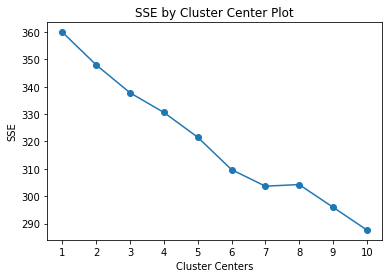

In [19]:
find_optimal_clusters(text, 10)

In [20]:
clusters = MiniBatchKMeans(n_clusters=3, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

In [21]:
data_no_outliers['label'] = 0
for position in data_no_outliers.index :
    data_no_outliers['label'][position] = clusters[position]

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


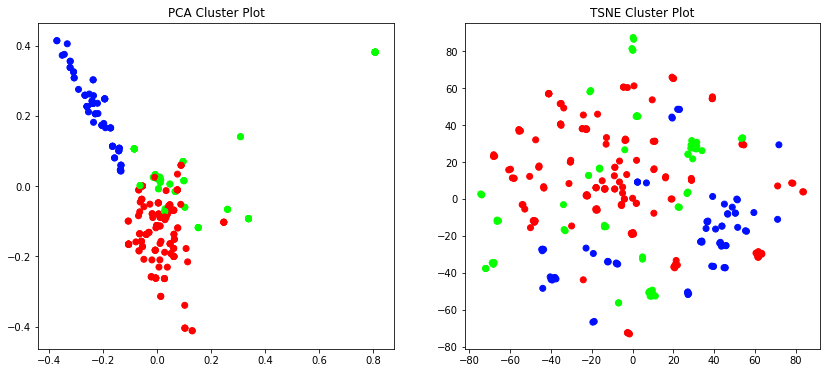

In [22]:
plot_tsne_pca(text, clusters)


In [23]:
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
peopl,public,symptom,travel,cdc,test,vaccin,covid,19,health

Cluster 1
case,across,step,hospit,slow,spread,rise,death,19,covid

Cluster 2
film,video,find,traffic,websit,stori,peopl,report,bbc,young


In [24]:
data_no_outliers

,Text,label
0,2020 2019 2018 2017 2016 2015 2014 2013 2012 2...,0
1,statement resum 73rd world health assembl chai...,0
2,digit updat find latest covid 19 content guida...,0
3,health emerg highlight issu health emerg highl...,0
4,global 9 33am cet 27 decemb 2020 79 062 802 co...,1
...,...,...
381,m8 glasgow citi eastbound sever disrupt j16 ca...,2
382,m5 bristol southbound sever disrupt a4 m5 bris...,2
383,conserv group wwf warn koala could wipe austra...,2
384,a47 norfolk westbound sever accid shack lane a...,2


In [25]:
data_no_outliers.to_csv(r'../dataset/5.corona_data_anxious_not_anxious.csv', index = False)

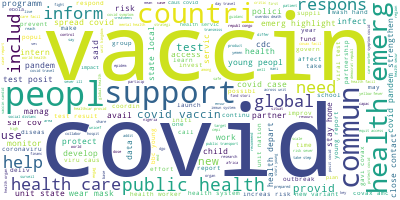

In [26]:

# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(data_no_outliers['Text'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()